In [1]:
import pandas as pd

In [2]:
heart = pd.read_csv("D:/Course Files/Datasets/clevelanda.csv")

In [3]:
heart['age'].mean()

54.43894389438944

In [4]:
heart['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [9]:
import numpy as np
heart = heart.replace('?', np.nan)

In [10]:
heart = heart.dropna()

In [12]:
heart['ca'] = pd.to_numeric(heart['ca'])

In [13]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [14]:
heart.std()

age          9.049736
gender       0.468500
cp           0.964859
trestbps    17.762806
chol        51.997583
fps          0.352474
restecg      0.994914
thalach     22.941562
exang        0.469761
oldpeak      1.166123
slope        0.618187
ca           0.938965
thal         1.938629
class        1.234551
dtype: float64

In [15]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


<Axes: >

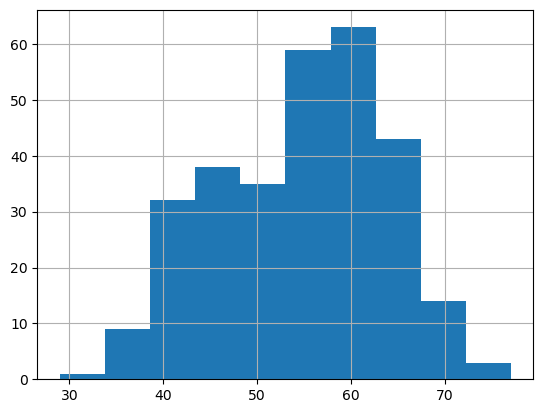

In [21]:
heart['age'].hist()

In [16]:
from sklearn.preprocessing import StandardScaler
z_data = StandardScaler().fit_transform(heart)

In [17]:
z_data = pd.DataFrame(z_data)

In [20]:
z_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


In [18]:
z_data.std()

0     1.001688
1     1.001688
2     1.001688
3     1.001688
4     1.001688
5     1.001688
6     1.001688
7     1.001688
8     1.001688
9     1.001688
10    1.001688
11    1.001688
12    1.001688
13    1.001688
dtype: float64

In [19]:
z_data.mean()

0    -1.226105e-16
1    -7.177199e-17
2    -4.037175e-17
3     4.904420e-16
4    -1.958777e-16
5    -4.186700e-17
6     4.784800e-17
7     4.784800e-16
8    -3.289550e-17
9     0.000000e+00
10   -1.136390e-16
11   -7.775299e-17
12   -1.196200e-16
13   -2.242875e-17
dtype: float64

In [ ]:
#If Sample Size is < 30, Go with T-Distribution

In [6]:
import numpy as np
import scipy.stats as st
st.t.interval(confidence=0.95, df=len(heart['age'])-1,
              loc=np.mean(heart['age']))

(52.47109366702371, 56.40679412175517)

In [ ]:
#If Sample Size is > 30, Go with Z-distribution

In [5]:
st.norm.interval(confidence=0.95,
                 loc=np.mean(heart['age']))

(52.478979909849386, 56.39890787892949)

# A researcher at BioSeed limited, claims to have modified the existing seed. The yeild for the two types of seeds is recorded for 10 equally sized farms. Is there enough evidence to claim that the there is no difference in the yeild due to the seed type?

Ho: difference in yield
Ha: No difference in the yield due to seed type 

![](2.png)

In [ ]:
# yield due to Ordinary Seed
ordinary_seed = pd.Series([450, 340, 562, 563, 234, 546, 876, 649, 736, 745])

# yield due to Modified Seed
modified_seed = pd.Series([345, 576, 675, 674, 865, 457, 776, 567, 568, 753])

Normality Test
1. Shapiro-Wilk Test
2. Kolmogorov-Smirnov Test


In [20]:
from scipy import stats
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Accept Alternate >> The data is not normally distributed")
    else:
        print("Accept Null hypothesis >> The data is normally distributed")

In [21]:

check_normality(ordinary_seed)
check_normality(modified_seed)

p value:0.9492
Fail to reject null hypothesis >> The data is normally distributed
p value:0.9296
Fail to reject null hypothesis >> The data is normally distributed


Variance Test
1. Levene’s Test
2. Bartlett’s Test

In [22]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Accept Alternate hypothesis >> The variances of the samples are different.")
    else:
        print("Accept null hypothesis >> The variances of the samples are same.")

In [23]:
check_variance_homogeneity(ordinary_seed, modified_seed)

p value:0.6651
Fail to reject null hypothesis >> The variances of the samples are same.


In [25]:
ttest,p_value = stats.ttest_ind(ordinary_seed, modified_seed)
print("p value:%.8f" % p_value)

if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.48925618
p_value:0.4893
Fail to reject null hypothesis


Null Hypothesis: All the Three Campaigns are giving same performance

Alternate Hypothesis: Different Performance


In [27]:
campaign1 = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
campaign2 = [ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
campaign3 = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

In [30]:
check_normality(campaign1)
check_normality(campaign2)
check_normality(campaign3)

stat, pvalue_levene= stats.levene(campaign1,campaign2,campaign3)
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")


p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.


In [32]:
F, p_value = stats.f_oneway(campaign1,campaign2,campaign3)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis
